

https://towardsdatascience.com/stockstats-a-handy-stocks-oriented-pandas-dataframe-wrapper-a879a06d9c3f

https://github.com/jealous/stockstats

# pip install yfinance
# pip install stockstats


In [1]:
import yfinance as yf
from stockstats import StockDataFrame

df = yf.download("SPY",
                 start="2020-01-01",
                 end="2020-12-31")
df

df = yf.download("SGGDX",
                 start="2020-01-01",
                 end="2020-12-31")
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,19.620001,19.620001,19.620001,19.620001,19.366840,0
2020-01-03,19.590000,19.590000,19.590000,19.590000,19.337227,0
2020-01-06,19.690001,19.690001,19.690001,19.690001,19.435936,0
2020-01-07,19.830000,19.830000,19.830000,19.830000,19.574129,0
2020-01-08,19.250000,19.250000,19.250000,19.250000,19.001614,0
...,...,...,...,...,...,...
2020-12-23,25.120001,25.120001,25.120001,25.120001,25.120001,0
2020-12-24,25.240000,25.240000,25.240000,25.240000,25.240000,0
2020-12-28,25.139999,25.139999,25.139999,25.139999,25.139999,0


In [2]:
stock_df = StockDataFrame.retype(df)
stock_df

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-02,19.620001,19.620001,19.620001,19.620001,19.366840,0
2020-01-03,19.590000,19.590000,19.590000,19.590000,19.337227,0
2020-01-06,19.690001,19.690001,19.690001,19.690001,19.435936,0
2020-01-07,19.830000,19.830000,19.830000,19.830000,19.574129,0
2020-01-08,19.250000,19.250000,19.250000,19.250000,19.001614,0
...,...,...,...,...,...,...
2020-12-23,25.120001,25.120001,25.120001,25.120001,25.120001,0
2020-12-24,25.240000,25.240000,25.240000,25.240000,25.240000,0
2020-12-28,25.139999,25.139999,25.139999,25.139999,25.139999,0


<AxesSubplot:title={'center':'Returns'}, xlabel='Date'>

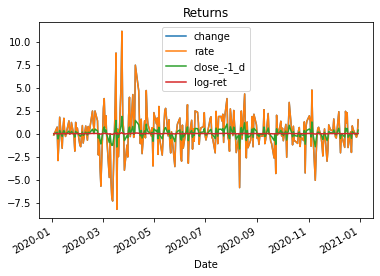

In [3]:
stock_df[["change", "rate", "close_-1_d", "log-ret"]].plot(title="Returns")

change / rate — these are the simple returns, that is the daily percentage change between the stock prices. Values are expressed in percentages.
close_-1_d — this is the price difference between time t and t-1. We will get back later to this special way of requesting values is stockstats.
log-ret — the log returns.

<AxesSubplot:title={'center':'SMA example'}, xlabel='Date'>

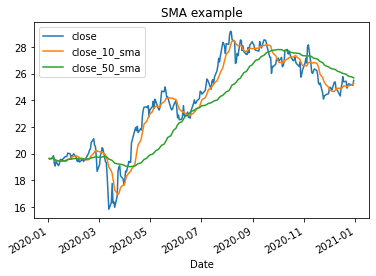

In [4]:
# stock_df[["close_10_sma", "close_50_sma"]]
# stock_df[["close", "close_10_sma", "close_50_sma"]]
stock_df[["close", "close_10_sma", "close_50_sma"]].plot(title = "SMA example")

On a side note, the StockDataFrame still retains the functionalities of the pandas DataFrame. So using a single square bracket to request a column would result in a pandas Series. And we can use pandas indexing to slice the DataFrame, for example

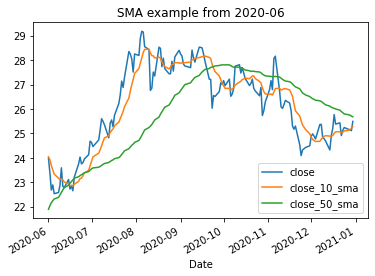

In [5]:
stock_df.loc["2020-06-01":, ["close", "close_10_sma", "close_50_sma"]].plot(title="SMA example from 2020-06");

Another TI we can easily calculate and plot are the Bollinger Bands.

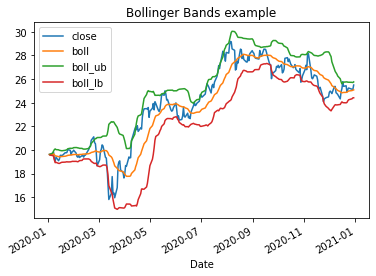

In [6]:
stock_df[["close", "boll", "boll_ub", "boll_lb"]].plot(title="Bollinger Bands example");